In [81]:
%matplotlib inline

import matlab.engine
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.image import imread

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "xtick.labelsize" : 7,
          "ytick.labelsize" : 7,
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
cm = 1/2.54

In [5]:
eng = matlab.engine.start_matlab()
eng.cd(r'../specialzeros-master/', nargout=0)

In [6]:
ratios = [float(x) for x in np.arange(2,10,0.2)]
phi = [np.pi/3, np.pi/2]
n_indices = [1,2,3]
v_60_indices = [n*np.pi/phi[0] for n in n_indices]
v_90_indices = [n*np.pi/phi[1] for n in n_indices]

m_index = 1.0

x_60 = []
for v in v_60_indices:
    temp = []
    for r in ratios:
        x = eng.besscrosszero(v,r,m_index,nargout=3)
        temp.append(x[0])
    x_60.append(temp)

x_60_02 = []
for r in ratios:
    x = eng.besscrosszero(0.0,r,2.0,nargout=3)
    x_60_02.append(x[0])

x_90 = []
for v in v_90_indices:
    temp = []
    for r in ratios:
        x = eng.besscrosszero(v,r,m_index,nargout=3)
        temp.append(x[0])
    x_90.append(temp)

x_90_02 = []
for r in ratios:
    x = eng.besscrosszero(0.0,r,2.0,nargout=3)
    x_90_02.append(x[0])

x_60.append(x_60_02)
x_90.append(x_90_02)

In [114]:

img = imread('asr60.png')
imagebox = OffsetImage(img, zoom = 0.045)
ab = AnnotationBbox(imagebox, (5.9, 4.4), frameon = False)

markers = [None,None , '>' ,'.']
legend = ['TM_{11}', 'TM_{21}', 'TM_{31}', 'TM_{02}']
style = ['dashdot', 'dashed', 'dashdot', 'solid']
extratick = [2.45]
def plot():
    with plt.style.context('bmh'):
        fig, ax = plt.subplots(figsize=(8.9*cm,7.1*cm))
        ax.set_xlabel(r'$b/a$')
        ax.set_ylabel(r'$k_{\nu m}a$')
        ax.minorticks_on()
        ax.add_artist(ab)
        for m,_x in enumerate(x_60):
            ax.plot(ratios, _x, lw = 0.8, ls = "{}".format(style[m]), color = 'black', label=r"${}$".format(legend[m]),
                marker = markers[m], markevery=4, mec=(0, 0, 1, 1), mfc=(.75, .75, 1, 1))
        
        lim = ax.get_xlim()
        ax.set_xticks(list(ax.get_xticks()) + extratick)
        ax.set_xlim(lim)
        ax.set_xticklabels(ax.get_xticks(), rotation = 45)
        plt.legend(frameon=False,fontsize = 7)
        plt.axvline(x=2.45,lw=0.86,color='grey')
        plt.tight_layout()
        plt.savefig('besselplot.pdf',bbox_inches='tight',dpi=1000,pad_inches = 0)
       

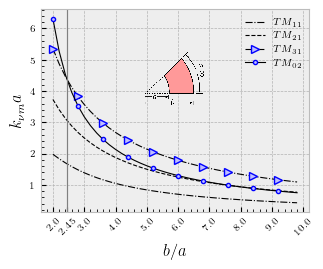

In [115]:
plot()

In [133]:
img = imread('asr60.png')
imagebox = OffsetImage(img, zoom = 0.045)
ab = AnnotationBbox(imagebox, (5.9, 4.4), frameon = False)

markers = [None,None , '>' ,'.']
legend = ['TM_{11}', 'TM_{21}', 'TM_{31}', 'TM_{02}']
style = ['dashdot', 'dashed', 'dashdot', 'solid']
extratick = [2.45]

def plot2():
    
    fig, ax = plt.subplots(figsize=(8.9*cm,7.1*cm))
    ax.set_xlabel(r'$b/a(=\lambda)$')
    ax.set_ylabel(r'$k_{\nu m}a$')
    ax.minorticks_on()
    ax.add_artist(ab)
    circle = plt.Circle((2.45, 4.4), 0.26, color='r', fill=False)
    ax.add_patch(circle)
    plt.text(2.8, 4.5, r'$\lambda=2.45$', color = 'r', fontsize=7)
    for m,_x in enumerate(x_60):
        ax.plot(ratios, _x, lw = 0.8, ls = "{}".format(style[m]), color = 'black', label=r"${}$".format(legend[m]),
            marker = markers[m], markevery=4, mec=(0, 0, 1, 1), mfc=(.75, .75, 1, 1))
        

    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    plt.legend(frameon=False,fontsize = 7)
    
    plt.tight_layout()
    plt.savefig('besselplot2.pdf',bbox_inches='tight',dpi=1000,pad_inches = 0)

C:\Users\hngul\AppData\Local\Temp\ipykernel_2488\1875318282.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


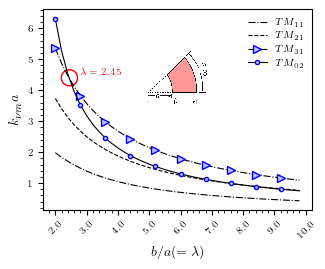

In [134]:
plot2()

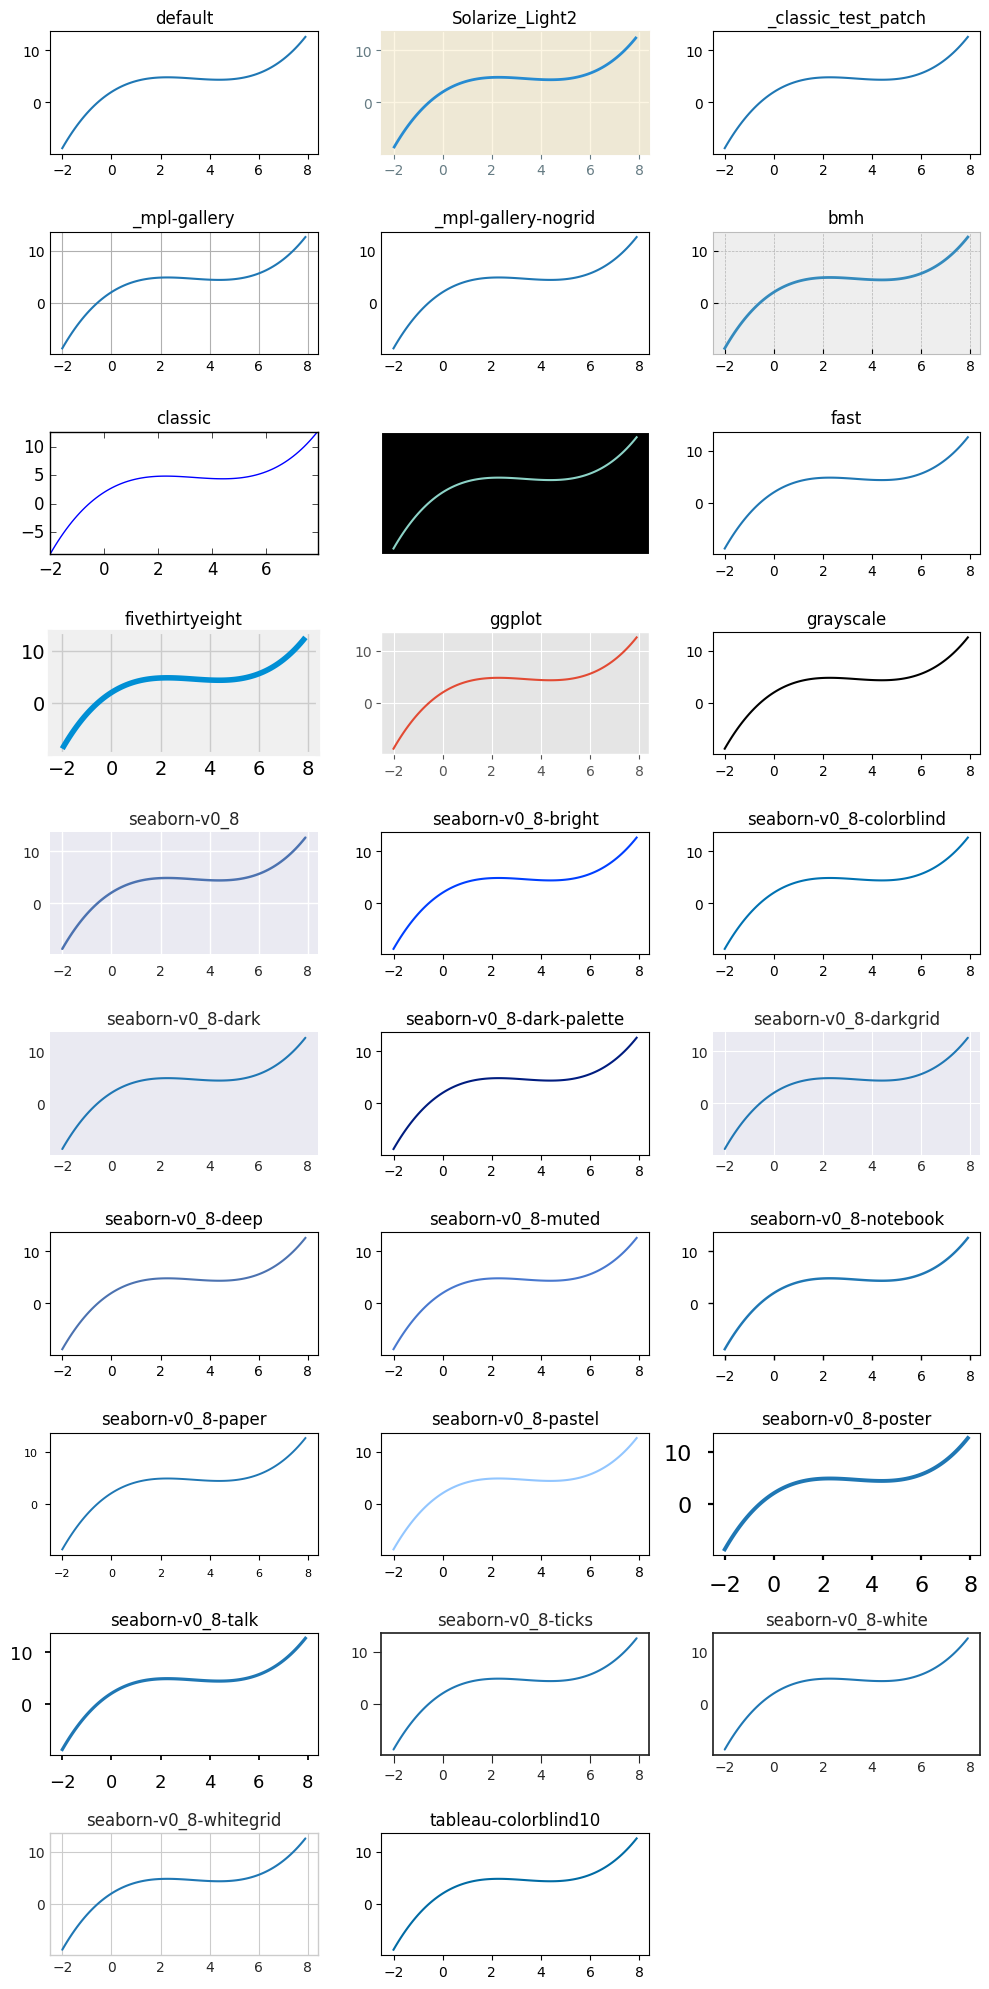

In [125]:
x = np.arange(-2, 8, .1)
y = .1 * x ** 3 - x ** 2 + 3 * x + 2

fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

In [193]:
eng.quit()
